# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"





### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_descrn = city_weather["weather"][0]["description"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Description":   city_weather_descrn})

    # If an error is experienced, skip the city
    except:
        print("City '" + city.title() + "' not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | kolonia town
Processing Record 3 of Set 1 | tucumcari
Processing Record 4 of Set 1 | kinik
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | holualoa
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | kerrville
Processing Record 13 of Set 1 | broome
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | flying fish cove
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | marovoay
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | sandnessjoen
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 

Processing Record 37 of Set 4 | richards bay
Processing Record 38 of Set 4 | karratha
Processing Record 39 of Set 4 | longyearbyen
Processing Record 40 of Set 4 | gorontalo
Processing Record 41 of Set 4 | sao desiderio
Processing Record 42 of Set 4 | strezhevoy
Processing Record 43 of Set 4 | bandar lampung
Processing Record 44 of Set 4 | kedougou
Processing Record 45 of Set 4 | achacachi
Processing Record 46 of Set 4 | nampula
Processing Record 47 of Set 4 | alice springs
Processing Record 48 of Set 4 | udachny
Processing Record 49 of Set 4 | uacu cungo
Processing Record 0 of Set 5 | naryn
Processing Record 1 of Set 5 | bogale
Processing Record 2 of Set 5 | san antonio de pale
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | neftcala
Processing Record 5 of Set 5 | minas de marcona
Processing Record 6 of Set 5 | port alfred
Processing Record 7 of Set 5 | nizao
Processing Record 8 of Set 5 | remire-montjoly
Processing Record 9 of Set 5 | navolato
Processing Record 10 

Processing Record 30 of Set 8 | laguna
Processing Record 31 of Set 8 | alesund
Processing Record 32 of Set 8 | orapa
Processing Record 33 of Set 8 | lodja
Processing Record 34 of Set 8 | kapuskasing
Processing Record 35 of Set 8 | tolanaro
Processing Record 36 of Set 8 | ocean pointe
City 'Ocean Pointe' not found. Skipping...
Processing Record 37 of Set 8 | sao joao da barra
Processing Record 38 of Set 8 | hilo
Processing Record 39 of Set 8 | takamaka
City 'Takamaka' not found. Skipping...
Processing Record 40 of Set 8 | sangju
Processing Record 41 of Set 8 | tranovaho
City 'Tranovaho' not found. Skipping...
Processing Record 42 of Set 8 | jian'ou
Processing Record 43 of Set 8 | nema
Processing Record 44 of Set 8 | al burayqah
Processing Record 45 of Set 8 | shakhovskaya
Processing Record 46 of Set 8 | essaouira
Processing Record 47 of Set 8 | mugia
Processing Record 48 of Set 8 | undurkhaan
Processing Record 49 of Set 8 | gantang
Processing Record 0 of Set 9 | saint-francois
Processin

Processing Record 17 of Set 12 | massenya
Processing Record 18 of Set 12 | taoudenni
Processing Record 19 of Set 12 | suva
Processing Record 20 of Set 12 | hani
Processing Record 21 of Set 12 | greenville
Processing Record 22 of Set 12 | xinyuan
Processing Record 23 of Set 12 | tarawa
Processing Record 24 of Set 12 | happy valley-goose bay
Processing Record 25 of Set 12 | boa vista
Processing Record 26 of Set 12 | ialibu
Processing Record 27 of Set 12 | maun
Processing Record 28 of Set 12 | woolgoolga
Processing Record 29 of Set 12 | batesville
Processing Record 30 of Set 12 | prince albert
Processing Record 31 of Set 12 | necochea
Processing Record 32 of Set 12 | mil'kovo
Processing Record 33 of Set 12 | anderson
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City           563
Lat            563
Lng            563
Max Temp       563
Humidity       563
Cloudiness     563
Wind Speed     563
Country        563
Description    563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Description
0,Port Mathurin,-19.6833,63.4167,72.95,69,0,16.11,MU,clear sky
1,Kolonia Town,6.9640,158.2060,82.51,89,100,4.61,FM,light rain
2,Tucumcari,35.1717,-103.7250,95.94,14,0,8.05,US,clear sky
3,Kinik,39.0872,27.3833,74.57,75,60,9.71,TR,broken clouds
4,Puerto Natales,-51.7236,-72.4875,35.83,96,89,3.60,CL,overcast clouds


In [6]:
# Let's reoder the colums of city_data_df 
columns_reoder = ["City", "Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Description"]

city_data_df = city_data_df[columns_reoder]
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Description
0,Port Mathurin,MU,-19.6833,63.4167,72.95,69,0,16.11,clear sky
1,Kolonia Town,FM,6.9640,158.2060,82.51,89,100,4.61,light rain
2,Tucumcari,US,35.1717,-103.7250,95.94,14,0,8.05,clear sky
3,Kinik,TR,39.0872,27.3833,74.57,75,60,9.71,broken clouds
4,Puerto Natales,CL,-51.7236,-72.4875,35.83,96,89,3.60,overcast clouds


In [7]:
# Export the City_Data into a csv
output_data_file = "../output_data/cities.csv"
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(5)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Description
City_ID,,,,,,,,,
0,Port Mathurin,MU,-19.6833,63.4167,72.95,69,0,16.11,clear sky
1,Kolonia Town,FM,6.9640,158.2060,82.51,89,100,4.61,light rain
2,Tucumcari,US,35.1717,-103.7250,95.94,14,0,8.05,clear sky
3,Kinik,TR,39.0872,27.3833,74.57,75,60,9.71,broken clouds
4,Puerto Natales,CL,-51.7236,-72.4875,35.83,96,89,3.60,overcast clouds


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

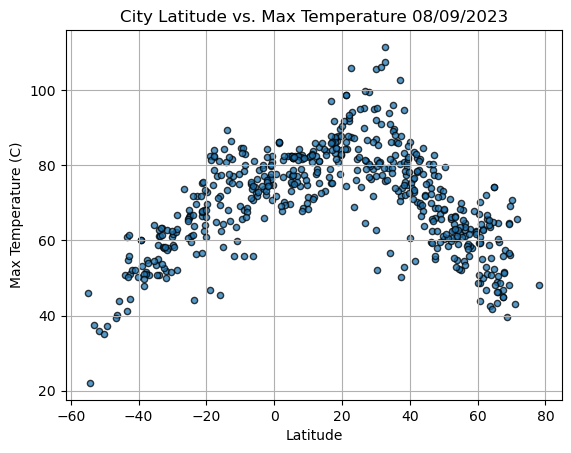

In [12]:
# Build scatter plot for latitude vs. temperature
date = dt.date.today().strftime("%m/%d/%Y")

# Incorporate the other graph properties
plt.scatter(city_data_df ["Lat"], city_data_df ["Max Temp"], marker="o",s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/lat_vs_temp.png")

plt.show()

# Show plot
plt.show()

#### Latitude Vs. Humidity

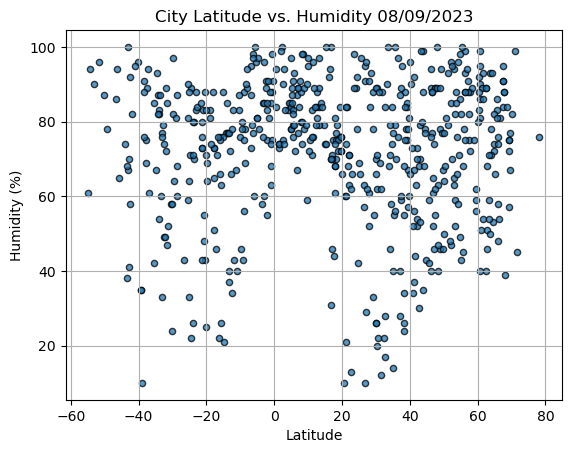

In [13]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
plt.scatter(city_data_df ["Lat"], city_data_df ["Humidity"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/lat_vs_Humi.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

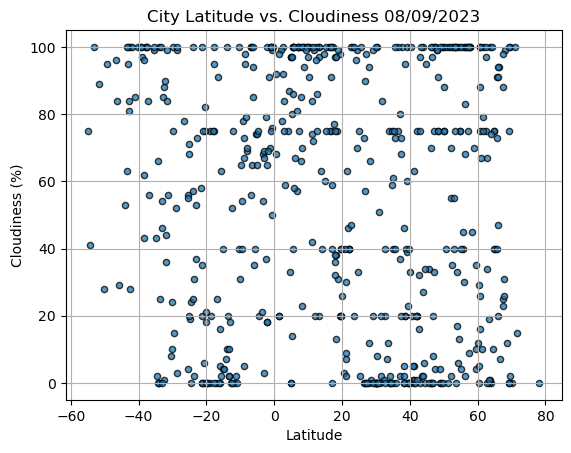

In [14]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.scatter(city_data_df ["Lat"], city_data_df ["Cloudiness"], marker="o", s=20,alpha=.75, edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/lat_vs_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

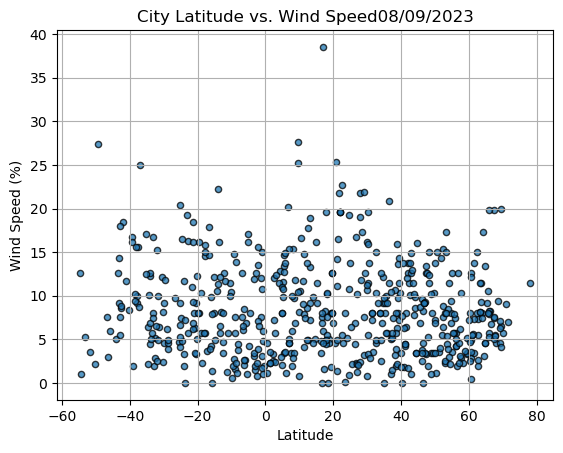

In [15]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

plt.scatter(city_data_df ["Lat"], city_data_df ["Wind Speed"], marker="o", s=20,alpha=.75, edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed{date}")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/lat_vs_Wind_S.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    #Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    
    plt.show()


In [17]:
# Display sample data
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Description
City_ID,,,,,,,,,
1,Kolonia Town,FM,6.9640,158.2060,82.51,89,100,4.61,light rain
2,Tucumcari,US,35.1717,-103.7250,95.94,14,0,8.05,clear sky
3,Kinik,TR,39.0872,27.3833,74.57,75,60,9.71,broken clouds
6,Holualoa,US,19.6228,-155.9522,84.04,72,40,12.66,scattered clouds
7,Iqaluit,CA,63.7506,-68.5145,42.53,93,100,11.50,mist


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Description
City_ID,,,,,,,,,
0,Port Mathurin,MU,-19.6833,63.4167,72.95,69,0,16.11,clear sky
4,Puerto Natales,CL,-51.7236,-72.4875,35.83,96,89,3.60,overcast clouds
5,Margaret River,AU,-33.9500,115.0667,50.72,83,100,4.45,overcast clouds
8,Adamstown,PN,-25.0660,-130.1015,66.00,64,71,20.36,broken clouds
10,Atafu Village,TK,-8.5421,-172.5159,83.05,78,95,13.91,light rain


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6671431990919404


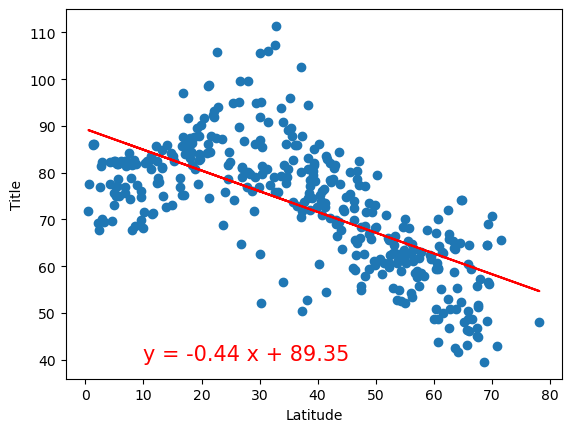

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (10,40))

The r-squared is: 0.7996751974336688


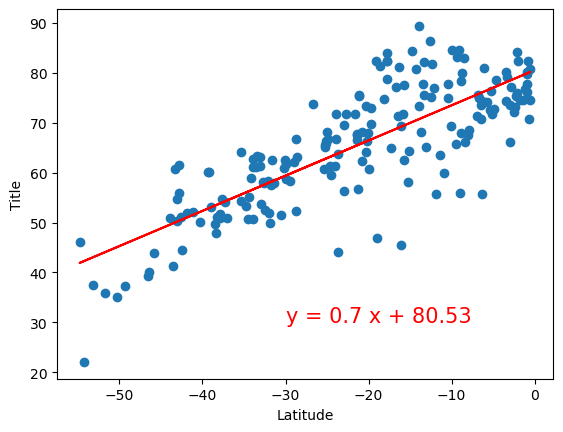

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,30))


**Discussion about the linear relationship:** According to City latitude vs Max Temperature, 1. I noticed that Northern Hemisphere has much more data points then Southern Hemisphere. 2. The lower latitudes have the hires temperstures. 3. The latitudes around 60 to 75 have the most lowest temperatures which are 10 to 45/50 , its increases next to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.09696734447791334


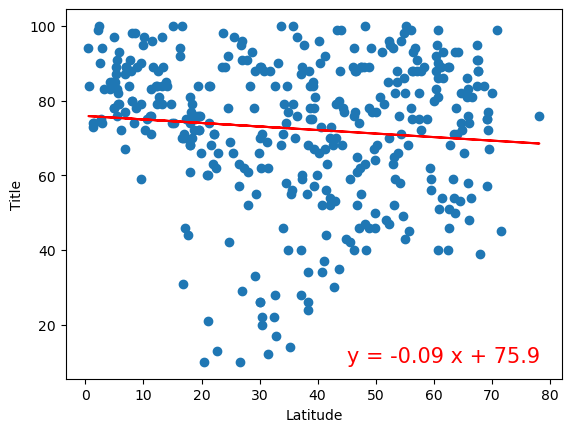

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (45,10))

The r-squared is: 0.08870113515821045


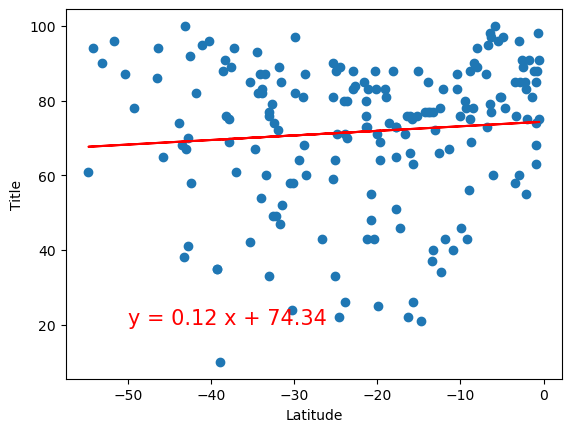

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-50,20))

**Discussion about the linear relationship:** There are no strong correlation between Latitude and Humidity.   Northern Hemisphere has much more data points then Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.16900150465606095


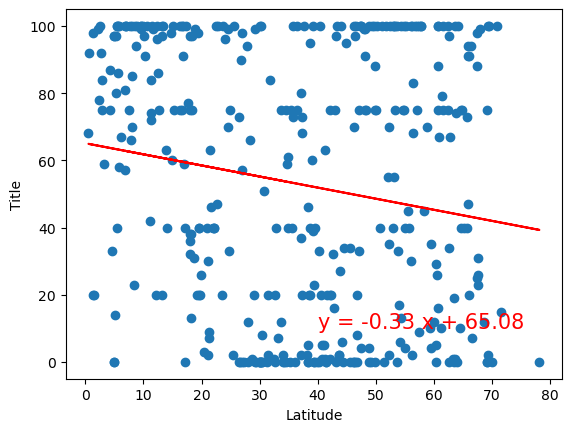

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: -0.12141514019152916


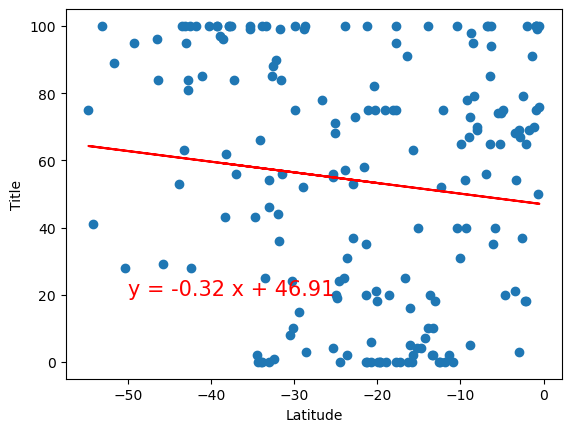

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-50,20))

**Discussion about the linear relationship:** There are no strong correlation between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.1129757885342367


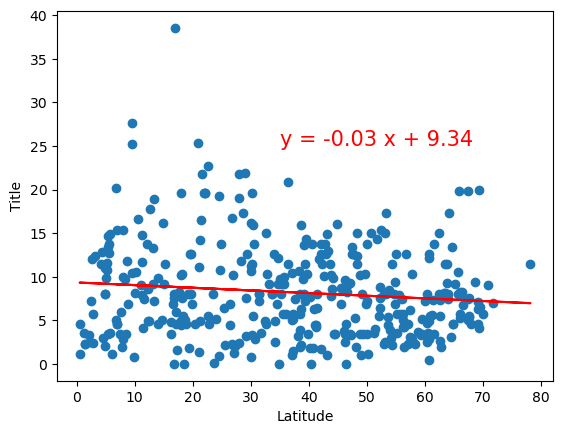

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (35,25))

The r-squared is: -0.17566656235556932


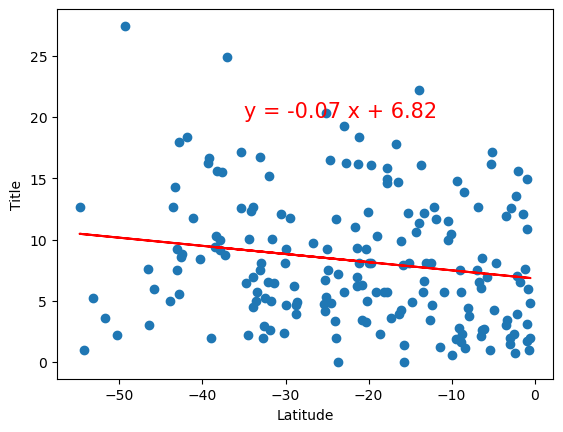

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-35,20))

**Discussion about the linear relationship:** The most cities have wind speeds no more then  0 to 10 or 11. Also ,The higher latitudes , the lower wind speed in the cities. 